In [28]:
library(ggplot2)
library(readr)
library(dplyr)
library(openintro)
library(dummies)
library(dendextend)
library(repr)
library(purrr)
options(repr.plot.width=6, repr.plot.height=4)

# Measuring distance between continious data
## Calculate & plot the distance between two players

You've obtained the coordinates relative to the center of the field for two players in a soccer match and would like to calculate the distance between them.

In this exercise you will plot the positions of the 2 players and manually calculate the distance between them by using the Euclidean distance formula.

$$\sqrt{(x_1−x_2)^2+(y_1−y_2)^2}$$

In [4]:
two_players <- data.frame(x = c(5,15), y = c(4,10))

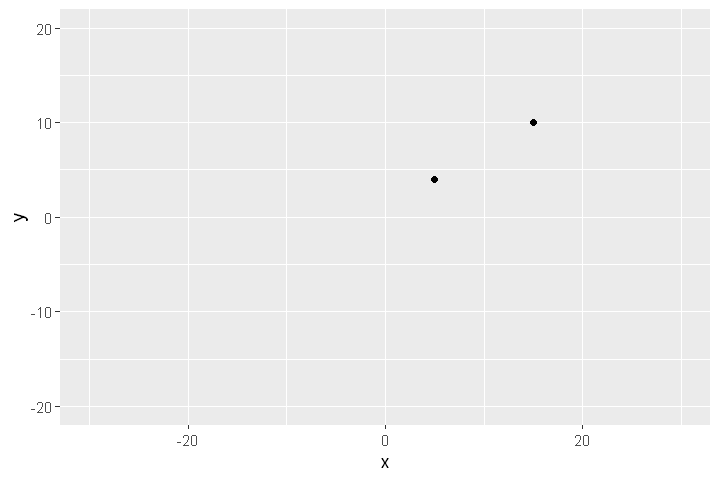

In [5]:
# Plot the positions of the players
ggplot(two_players, aes(x = x, y = y)) + 
  geom_point() +
  # Assuming a 40x60 field
  lims(x = c(-30,30), y = c(-20, 20))

In [6]:
# Split the players data frame into two observations
player1 <- two_players[1, ]
player2 <- two_players[2, ]

# Calculate and print their distance using the Euclidean Distance formula
player_distance <- sqrt( (player1$x - player2$x)^2 + (player1$y - player2$y)^2 )
player_distance

[1] 11.6619

## Using the dist() function

Using the Euclidean formula manually may be practical for 2 observations but can get more complicated rather quickly when measuring the distance between many observations.

The `dist()` function simplifies this process by calculating distances between our observations (rows) using their features (columns). In this case the observations are the player positions and the dimensions are their x and y coordinates.

Note: The default distance calculation for the `dist()` function is Euclidean distance

In [7]:
three_players <- two_players %>% add_row(x = 0, y = 20)

In [8]:
# Calculate the Distance Between two_players
dist_two_players <- dist(two_players)
dist_two_players

# Calculate the Distance Between three_players
dist_three_players <- dist(three_players)
dist_three_players

        1
2 11.6619

         1        2
2 11.66190         
3 16.76305 18.02776

In [9]:
data(trees)

## Effects of scale

You have learned that when a variable is on a larger scale than other variables in your data it may disproportionately influence the resulting distance calculated between your observations. Lets see this in action by observing a sample of data from the trees data set.

You will leverage the `scale()` function which by default centers & scales our column features.

Our variables are the following:
 * Girth - tree diameter in inches
 * Height - tree height in inches


In [10]:
# Calculate distance for three_trees 
dist_trees <- dist(trees[1:3,1:2])

# Scale three trees & calculate the distance  
scaled_three_trees <- scale(trees[1:3,1:2])
dist_scaled_trees <- dist(scaled_three_trees)

# Output the results of both Matrices
print('Without Scaling')
dist_trees

print('With Scaling')
dist_scaled_trees

[1] "Without Scaling"


         1        2
2 5.008992         
3 7.017834 2.009975

[1] "With Scaling"


          1         2
2 1.8286961          
3 2.7778767 0.9691601

# Measuring distance for categorical data
## Calculating distance between categorical variables

In this exercise you will explore how to calculate binary (Jaccard) distances. In order to calculate distances we will first have to dummify our categories using the `dummy.data.frame()` from the library dummies

$$J(1, 2) = \frac{1\cap2}{1\cup2}= \frac{1}{4} = 0.25 $$
$$ distance(1, 2) = 1 − J(1, 2) = 0.75 $$

You will use a small collection of survey observations stored in the data frame job_survey with the following columns:

    job_satisfaction Possible options: "Hi", "Mid", "Low"
    is_happy Possible options: "Yes", "No"


In [11]:
job_survey <- data.frame(job_satisfaction = c("Low", "Low", "Hi", "Low", "Mid"), is_happy = c("No", "No", "Yes", "No", "No"))

# Dummify the Survey Data
dummy_survey <- dummy.data.frame(job_survey)

# Calculate the Distance
dist_survey <- dist(dummy_survey, method = "binary")

# Print the Original Data
job_survey

# Print the Distance Matrix
dist_survey

job_satisfaction,is_happy
Low,No
Low,No
Hi,Yes
Low,No
Mid,No


          1         2         3         4
2 0.0000000                              
3 1.0000000 1.0000000                    
4 0.0000000 0.0000000 1.0000000          
5 0.6666667 0.6666667 1.0000000 0.6666667

# Comparing more than two observation
## Calculating linkage

Let us revisit the example with three players on a field. The distance matrix between these three players is shown below and is available as the variable dist_players.

From this we can tell that the first group that forms is between players 1 & 2, since they are the closest to one another with a Euclidean distance value of 11.

Now you want to apply the three linkage methods you have learned to determine what the distance of this group is to player 3.

<b>Linkage Criteria</b>
 * Complete Linkage: maximum distance between two sets
 * Single Linkage: minimum distance between two sets
 * Average Linkage: average distance between two sets

In [12]:
dist_three_players

         1        2
2 11.66190         
3 16.76305 18.02776

In [13]:
# Extract the pair distances
distance_1_2 <- dist_three_players[1]
distance_1_3 <- dist_three_players[2]
distance_2_3 <- dist_three_players[3]

# Calculate the complete distance between group 1-2 and 3
complete <- max(c(distance_1_3, distance_2_3 ))
complete

# Calculate the single distance between group 1-2 and 3
single <- min(c(distance_1_3, distance_2_3))
single

# Calculate the average distance between group 1-2 and 3
average <- mean(c(distance_1_3, distance_2_3))
average


[1] 18.02776

[1] 16.76305

[1] 17.39541

# Capturing K clusters
## Assign cluster membership

In this exercise you will leverage the `hclust()` function to calculate the iterative linkage steps and you will use the `cutree()` function to extract the cluster assignments for the desired number (`k`) of clusters.

You are given the positions of 12 players at the start of a 6v6 soccer match. This is stored in the `lineup` dataframe.

You know that this match has two teams (k = 2), let's use the clustering methods you learned to assign which team each player belongs in based on their position.

Notes:

 * The linkage method can be passed via the method parameter: `hclust(distance_matrix, method = "complete")`
 * Remember that in soccer opposing teams start on their half of the field.
 * Because these positions are measured using the same scale we do not need to re-scale our data.


In [14]:
lineup <- readRDS("lineup.rds")

In [15]:
# Calculate the Distance
dist_players <- dist(lineup)

# Perform the hierarchical clustering using the complete linkage
hc_players <- hclust(dist_players)

# Calculate the assignment vector with a k of 2
clusters_k2 <- cutree(hc_players, k = 2)

# Create a new dataframe storing these results
lineup_k2_complete <- mutate(lineup, cluster = clusters_k2)

## Exploring the clusters

Because clustering analysis is always in part qualitative, it is incredibly important to have the necessary tools to explore the results of the clustering.

In this exercise you will explore that data frame you created in the previous exercise lineup_k2_complete.

Reminder: The lineup_k2_complete dataframe contains the x & y positions of 12 players at the start of a 6v6 soccer game to which you have added clustering assignments based on the following parameters:

 * Distance: Euclidean
 * Number of Clusters (k): 2
 * Linkage Method: Complete


cluster,n
1,6
2,6


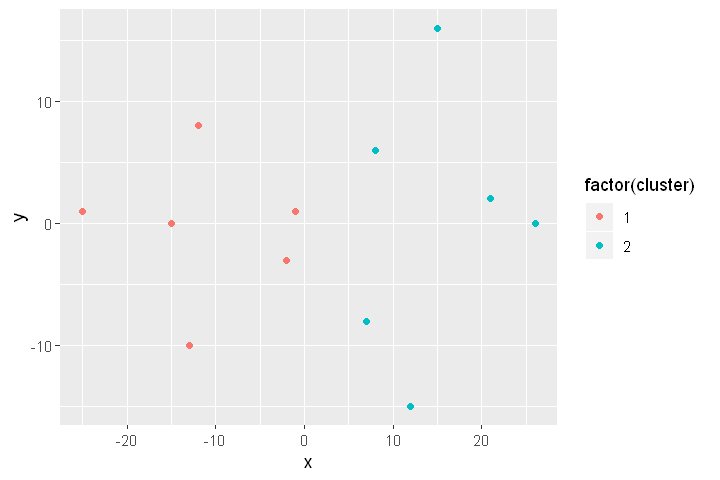

In [16]:
# Count the cluster assignments
count(lineup_k2_complete, cluster)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_k2_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

# Visualisation 
## Comparing average, single & complete linkage

You are now ready to analyze the clustering results of the lineup dataset using the dendrogram plot. This will give you a new perspective on the effect the decision of the linkage method has on your resulting cluster analysis.

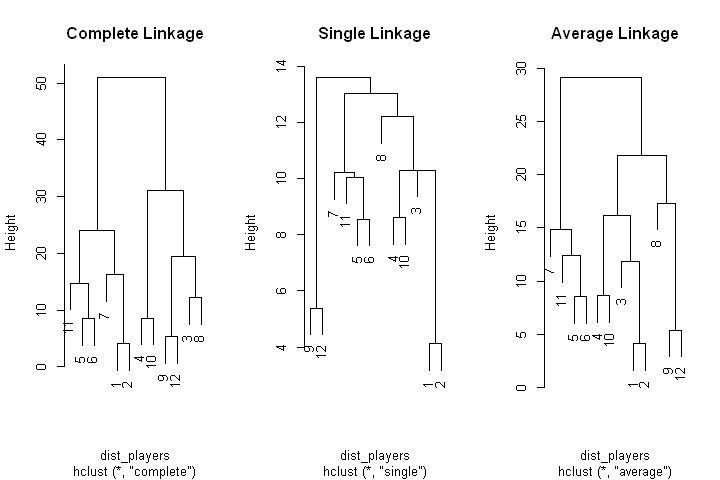

In [17]:
# Prepare the Distance Matrix
dist_players <- dist(lineup)

# Generate hclust for complete, single & average linkage methods
hc_complete <- hclust(dist_players, method = "complete")
hc_single <- hclust(dist_players, method = "single")
hc_average <- hclust(dist_players, method = "average")

# Plot & Label the 3 Dendrograms Side-by-Side
# Hint: To see these Side-by-Side run the 4 lines together as one command
par(mfrow = c(1,3))
plot(hc_complete, main = 'Complete Linkage')
plot(hc_single, main = 'Single Linkage')
plot(hc_average, main = 'Average Linkage')

<b>Height of the tree</b>

An advantage of working with a clustering method like hierarchical clustering is that you can describe the relationships between your observations based on both the distance metric and the linkage metric selected (the combination of which defines the height of the tree).

For the middle tree:we can concretely say that for the branch on a tree all members that are a part of that branch must have a minimum Euclidean distance amongst one another equal to or less than the height of that branch.

## Clusters based on height

In previous exercises you have grouped your observations into clusters using a pre-defined number of clusters (k). In this exercise you will leverage the visual representation of the dendrogram in order to group your observations into clusters using a maximum height (h), below which clusters form.

You will work the `color_branches()` function from the dendextend library in order to visually inspect the clusters that form at any height along the dendrogram.

The hc_players has been carried over from your previous work with the soccer line-up data.

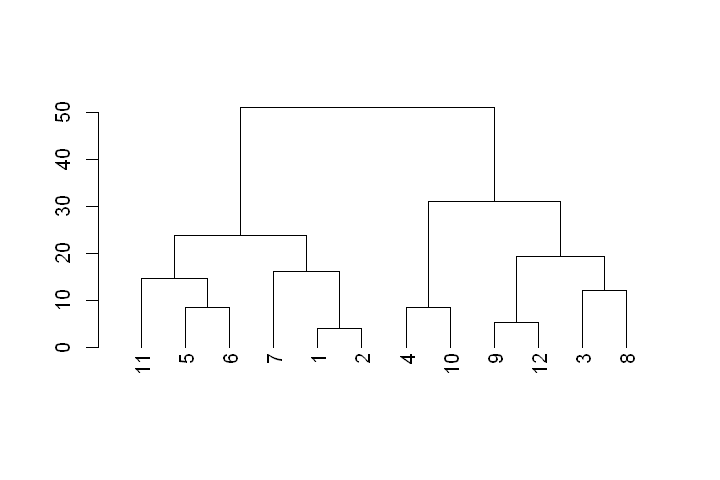

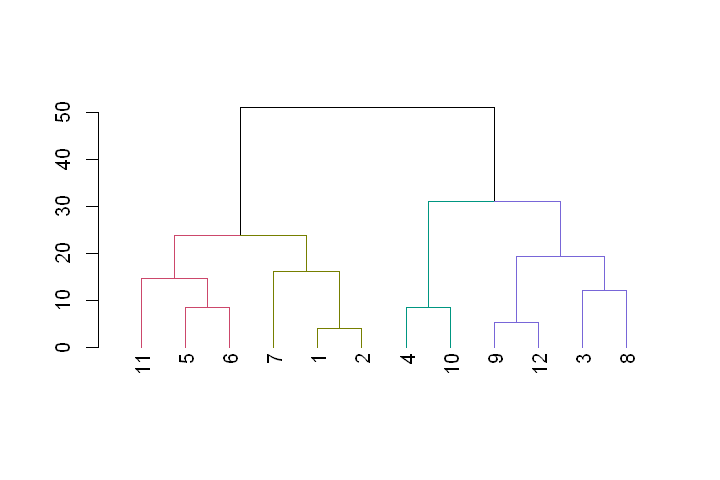

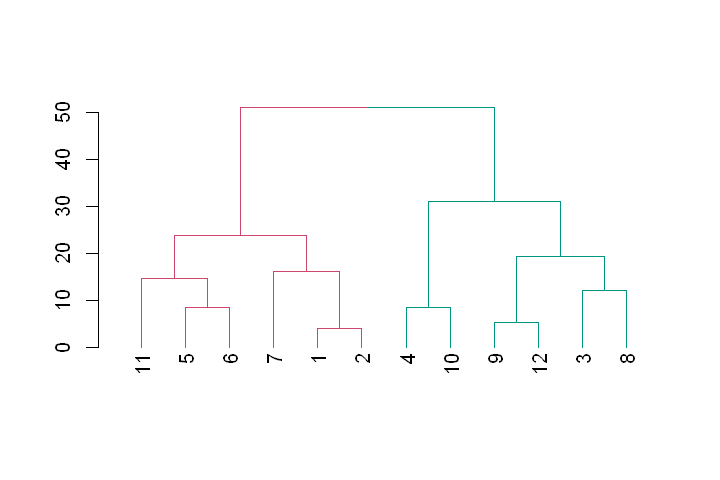

In [18]:
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Create a dendrogram object from the hclust variable
dend_players <- as.dendrogram(hc_players)

# Plot the dendrogram
plot(dend_players)

# Color branches by cluster formed from the cut at a height of 20 & plot
dend_20 <- color_branches(dend_players, h = 20)

# Plot the dendrogram with clusters colored below height 20
plot(dend_20)

# Color branches by cluster formed from the cut at a height of 40 & plot
dend_40 <- color_branches(dend_players, h = 40)

# Plot the dendrogram with clusters colored below height 40
plot(dend_40)


## Exploring the branches cut from the tree

The cutree() function you used in exercises 5 & 6 can also be used to cut a tree at a given height by using the h parameter. Take a moment to explore the clusters you have generated from the previous exercises based on the heights 20 & 40.

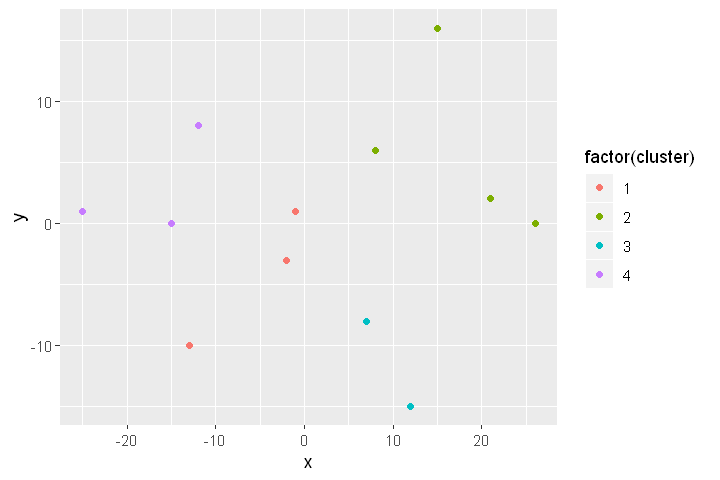

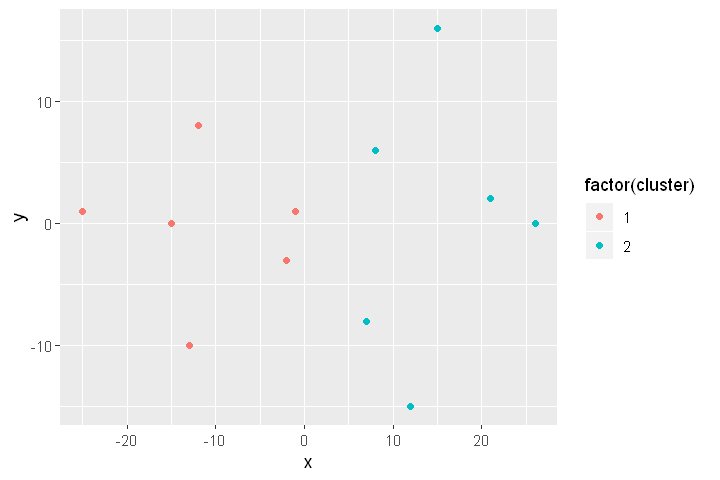

In [19]:
dist_players <- dist(lineup, method = 'euclidean')
hc_players <- hclust(dist_players, method = "complete")

# Calculate the assignment vector with a h of 20
clusters_h20 <- cutree(hc_players, h = 20)

# Create a new dataframe storing these results
lineup_h20_complete <- mutate(lineup, cluster = clusters_h20)

# Calculate the assignment vector with a h of 40
clusters_h40 <- cutree(hc_players, h = 40)

# Create a new dataframe storing these results
lineup_h40_complete <- mutate(lineup, cluster = clusters_h40)

# Plot the positions of the players and color them using their cluster for height = 20
ggplot(lineup_h20_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

# Plot the positions of the players and color them using their cluster for height = 40
ggplot(lineup_h40_complete, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()


The height of any branch is determined by the linkage and distance decisions (in this case complete linkage and Euclidean distance). While the members of the clusters that form below a desired height have a maximum linkage+distance amongst themselves that - han the desired height.

### Segment wholesale customers

You're now ready to use hierarchical clustering to perform market segmentation (i.e. use consumer characteristics to group them into subgroups).

In this exercise you are provided with the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the dataframe customers_spend. Assign these clients into meaningful clusters.

Note: For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

In [20]:
customers_spend <- readRDS("ws_customers.rds")

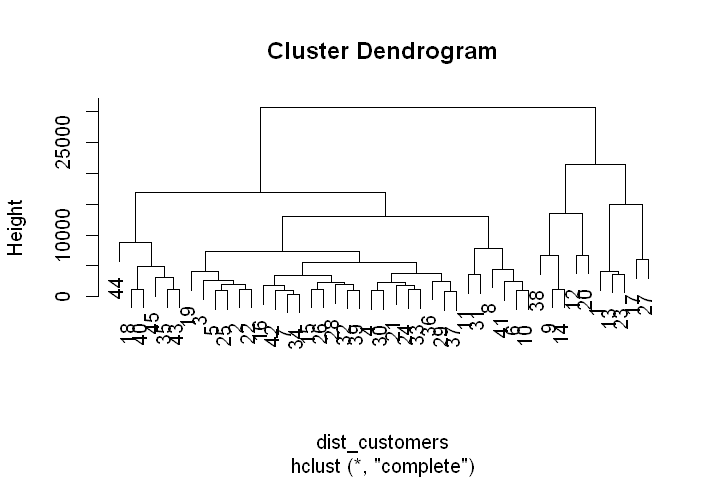

In [21]:
# Calculate Euclidean distance between customers
dist_customers <- dist(customers_spend, method = "euclidean")

# Generate a complete linkage analysis 
hc_customers <- hclust(dist_customers, method = "complete")

# Plot the dendrogram
plot(hc_customers)

# Create a cluster assignment vector at h = 15000
clust_customers <- cutree(hc_customers, h = 15000)

# Generate the segmented customers dataframe
segment_customers <- mutate(customers_spend, cluster = clust_customers)

In [22]:
# Count the number of customers that fall into each cluster
count(segment_customers, cluster)

cluster,n
1,5
2,29
3,5
4,6


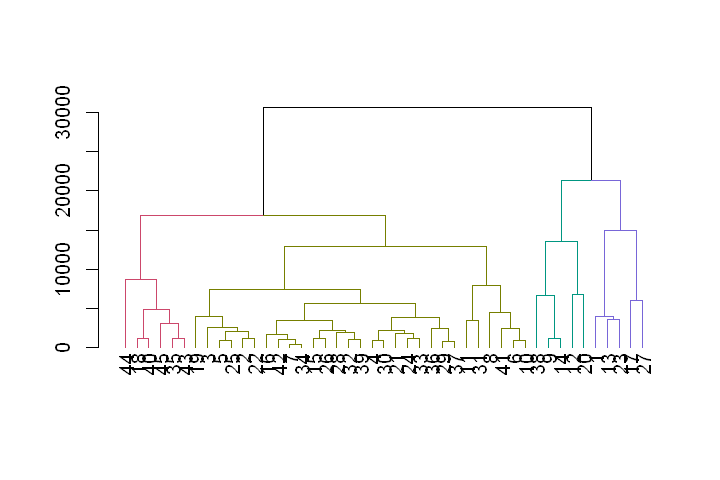

In [23]:
# Color the dendrogram based on the height cutoff
dend_customers <- as.dendrogram(hc_customers)
dend_colored <- color_branches(dend_customers, h = 15000)

# Plot the colored dendrogram
plot(dend_colored)

In [24]:
# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(funs(mean(.)))

cluster,Milk,Grocery,Frozen
1,16950.000,12891.400,991.200
2,2512.828,5228.931,1795.517
3,10452.200,22550.600,1354.800
4,1249.500,3916.833,10888.667


# Introduction to k-means
### K-means on a soccer field

In the previous chapter you used the lineup dataset to learn about hierarchical clustering, in this chapter you will use the same data to learn about k-means clustering. As a reminder, the lineup dataframe contains the positions of 12 players at the start of a 6v6 soccer match.

Just like before, you know that this match has two teams on the field so you can perform a k-means analysis using `k = 2` in order to determine which player belongs to which team.

Note that in the `kmeans()` function `k` is specified using the `centers` parameter.

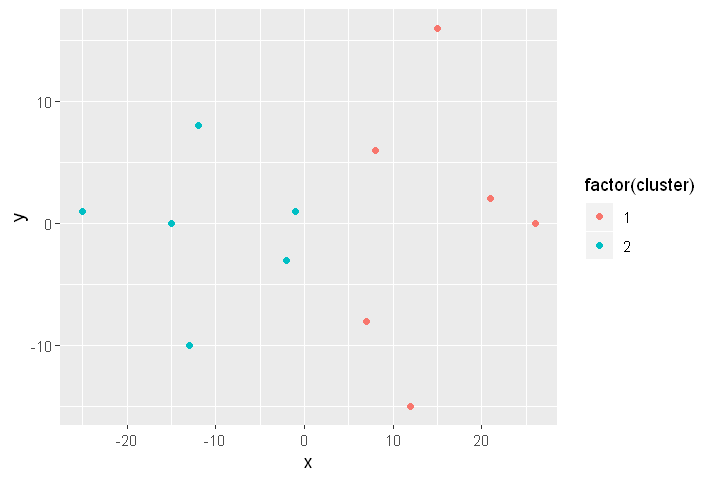

In [26]:
# Build a kmeans model
model_km2 <- kmeans(lineup, centers = 2)

# Extract the cluster assignment vector from the kmeans model
clust_km2 <- model_km2$cluster

# Create a new dataframe appending the cluster assignment
lineup_km2 <- mutate(lineup, cluster = clust_km2)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km2, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

### K-means on a soccer field (part 2)

In the previous exercise you successfully used the k-means algorithm to cluster the two teams from the lineup data frame. This time, let's explore what happens when you use a k of 3.

You will see that the algorithm will still run, but does it actually make sense in this context...

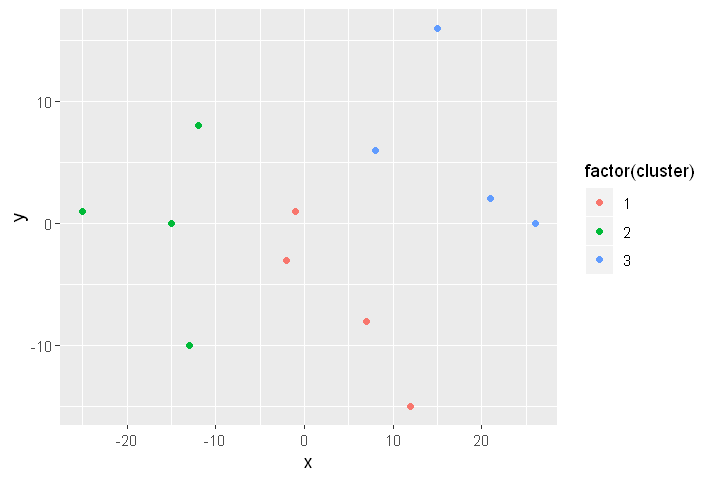

In [27]:
# Build a kmeans model
model_km3 <- kmeans(lineup, centers = 3)

# Extract the cluster assignment vector from the kmeans model
clust_km3 <- model_km3$cluster

# Create a new dataframe appending the cluster assignment
lineup_km3 <- mutate(lineup, cluster = clust_km3)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km3, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

Remember we only have 2 teams on the field. It's very important to remember that k-means will run with any k that is more than 2 and less than your total observations, but it doesn't always mean the results will be meaningful. 

### Many K's many models

While the lineup dataset clearly has a known value of k, often times the optimal number of clusters isn't known and must be estimated.

In this exercise you will leverage `map_dbl()` from the `purrr` library to run k-means using values of k ranging from 1 to 10 and extract the <b>total within-cluster sum of squares metric</b> from each one. This will be the first step towards visualizing the elbow plot.

In [29]:
# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = lineup, centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10 ,
  tot_withinss = tot_withinss
)

### Elbow (Scree) plot

In the previous exercises you have calculated the total within-cluster sum of squares for values of k ranging from 1 to 10. You can visualize this relationship using a line plot to create what is known as an elbow plot (or scree plot).

When looking at an elbow plot you want to see a sharp decline from one k to another followed by a more gradual decrease in slope. The last value of k before the slope of the plot levels off suggests a "good" value of k.

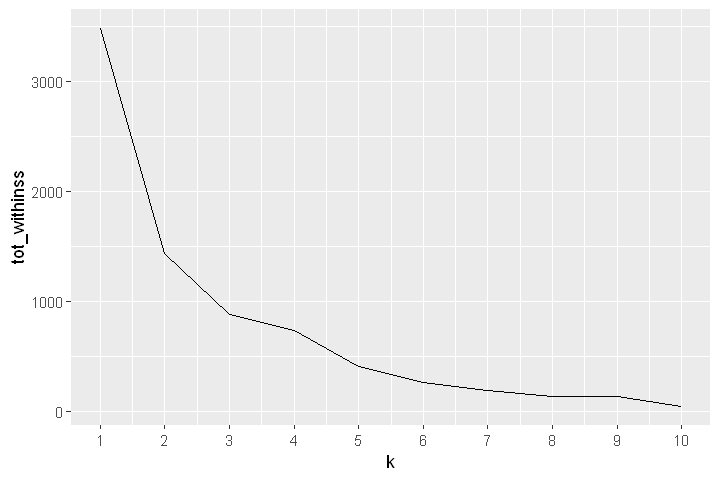

In [31]:
# Plot the elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10)

That is correct, you can see that there is a sharp change in the slope of this line that makes an \"elbow\" shape. Furthermore, this is supported by the prior knowledge that there are two teams in this data and a k of 2 is desired.

# Silhouette analysis

Silhouette analysis allows you to calculate how similar each observations is with the cluster it is assigned relative to other clusters. This metric (silhouette width) ranges from -1 to 1 for each observation in your data and can be interpreted as follows:

 * Values close to 1 suggest that the observation is well matched to the assigned cluster
 * Values close to 0 suggest that the observation is borderline matched between two clusters
 * Values close to -1 suggest that the observations may be assigned to the wrong cluster

In this exercise you will leverage the `pam()` and the `silhouette()` functions from the cluster library to perform silhouette analysis to compare the results of models with a k of 2 and a k of 3. You'll continue working with the lineup dataset.

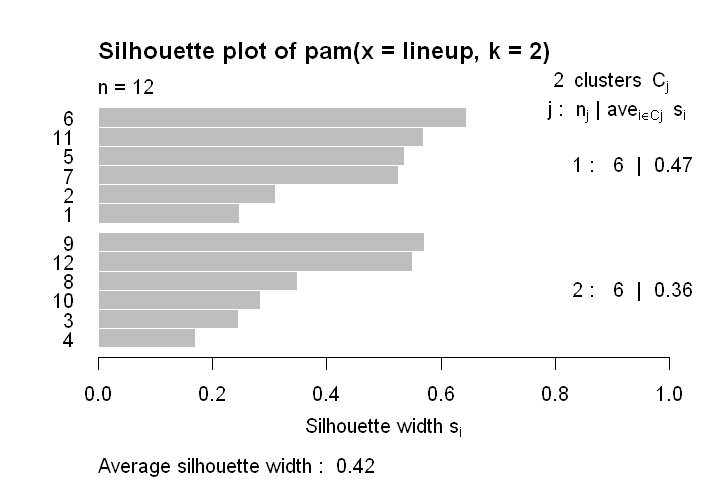

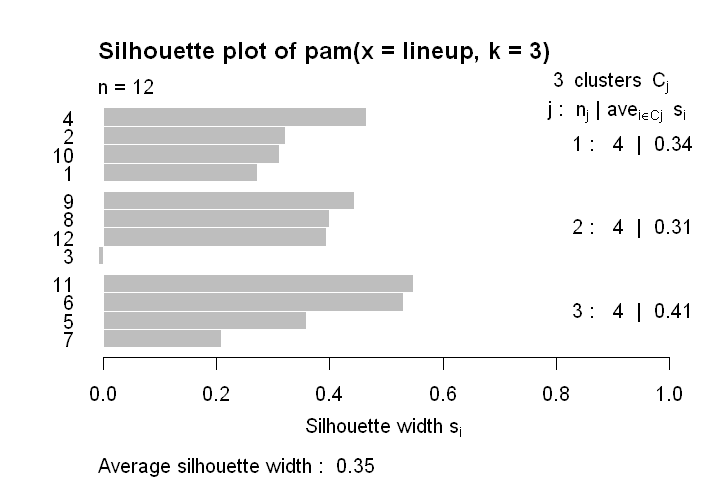

In [32]:
library(cluster)

# Generate a k-means model using the pam() function with a k = 2
pam_k2 <- pam(lineup, k = 2)

# Plot the silhouette visual for the pam_k2 model
plot(silhouette(pam_k2))

# Generate a k-means model using the pam() function with a k = 3
pam_k3 <- pam(lineup, k = 3)

# Plot the silhouette visual for the pam_k3 model
plot(silhouette(pam_k3))


Did you notice that for k = 2, no observation has a silhouette width close to 0? What about the fact that for k = 3, observation 3 is close to 0 and is negative? This suggests that k = 3 is not the right number of clusters. 

## Revisiting wholesale data: "Best" k

At the end of Chapter 2 you explored wholesale distributor data customers_spend using hierarchical clustering. This time you will analyze this data using the k-means clustering tools covered in this chapter.

The first step will be to determine the "best" value of k using average silhouette width.

A refresher about the data: it contains records of the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the dataframe customers_spend. For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

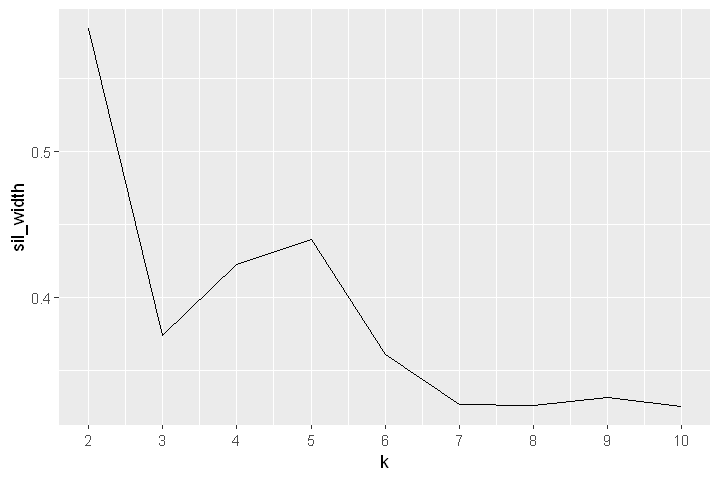

In [33]:
# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(x = customers_spend, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)

 From the plot I hope you noticed that k = 2 has the highest average sillhouette width and is the “best” value of k we will move forward with. 

## Revisiting wholesale data: Exploration

From the previous analysis you have found that k = 2 has the highest average silhouette width. In this exercise you will continue to analyze the wholesale customer data by building and exploring a kmeans model with 2 clusters.

In [34]:
set.seed(42)

# Build a k-means model for the customers_spend with a k of 2
model_customers <- kmeans(x = customers_spend, centers = 2)

# Extract the vector of cluster assignments from the model
clust_customers <- model_customers$cluster

# Build the segment_customers dataframe
segment_customers <- mutate(customers_spend, cluster = clust_customers)

# Calculate the size of each cluster
count(segment_customers, cluster)

# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(funs(mean(.)))

cluster,n
1,35
2,10


cluster,Milk,Grocery,Frozen
1,2296.257,5004,3354.343
2,13701.100,17721,1173.000


 It seems that in this case cluster 1 consists of individuals who proportionally spend more on Frozen food while cluster 2 customers spend more on Milk and Grocery. Did you notice that when you explored this data using hierarchical clustering, the method resulted in 4 clusters while using k-means got you 2? Both of these results are valid, but which one is appropriate for this would require more subject matter expertise. Before you proceed with the next chapter, remember that: Generating clusters is a science, but interpreting them is an art. 

# Occupational wage data
### Hierarchical clustering: Occupation trees

In the previous exercise you have learned that the oes data is ready for hierarchical clustering without any preprocessing steps necessary. In this exercise you will take the necessary steps to build a dendrogram of occupations based on their yearly average salaries and propose clusters using a height of 100,000.

In [35]:
oes <- readRDS("oes.rds")

In [36]:
head(oes)

,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200


In [37]:
summary(oes)

      2001            2002            2003            2004      
 Min.   :16720   Min.   :17180   Min.   :17400   Min.   :17620  
 1st Qu.:26728   1st Qu.:27393   1st Qu.:27858   1st Qu.:28535  
 Median :34575   Median :35205   Median :36180   Median :37335  
 Mean   :37850   Mean   :39701   Mean   :41018   Mean   :42275  
 3rd Qu.:49875   3rd Qu.:53108   3rd Qu.:55733   3rd Qu.:57443  
 Max.   :70800   Max.   :78870   Max.   :83400   Max.   :87090  
      2005            2006            2007            2008       
 Min.   :17840   Min.   :18430   Min.   :19440   Min.   : 20220  
 1st Qu.:29043   1st Qu.:29688   1st Qu.:30810   1st Qu.: 31643  
 Median :37790   Median :39030   Median :40235   Median : 41510  
 Mean   :42775   Mean   :44329   Mean   :46074   Mean   : 47763  
 3rd Qu.:58005   3rd Qu.:59915   3rd Qu.:62313   3rd Qu.: 64610  
 Max.   :88450   Max.   :91930   Max.   :96150   Max.   :100310  
      2010             2011             2012             2013       
 Min.   : 2124

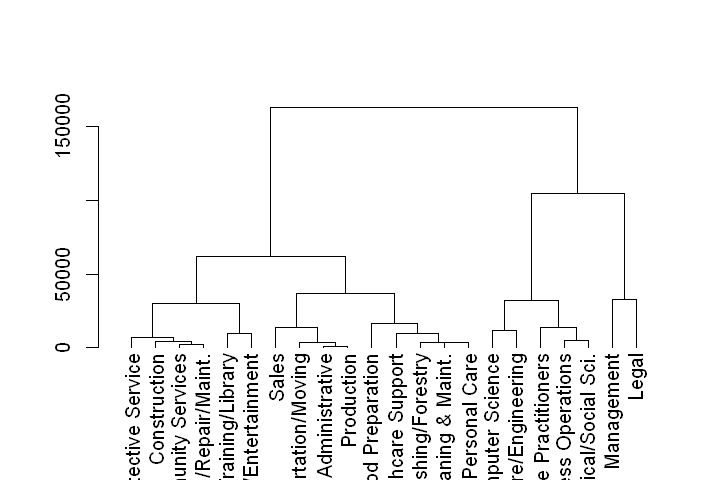

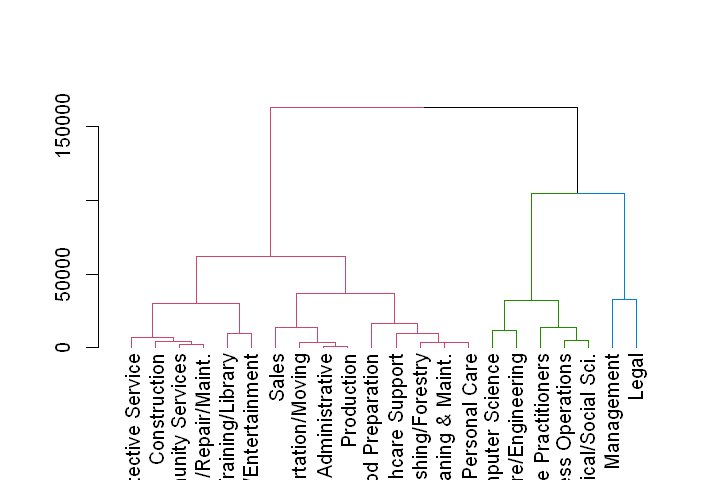

In [38]:
# Calculate Euclidean distance between the occupations
dist_oes <- dist(oes, method = "euclidean")

# Generate an average linkage analysis 
hc_oes <- hclust(dist_oes, method = "average")

# Create a dendrogram object from the hclust variable
dend_oes <- as.dendrogram(hc_oes)

# Plot the dendrogram
plot(dend_oes)

# Color branches by cluster formed from the cut at a height of 100000
dend_colored <- color_branches(dend_oes, h = 100000)

# Plot the colored dendrogram
plot(dend_colored)

Based on the dendrogram it may be reasonable to start with the three clusters formed at a height of 100,000. The members of these clusters appear to be tightly grouped but different from one another. Let's continue this exploration. 

## Hierarchical clustering: Preparing for exploration

You have now created a potential clustering for the oes data, before you can explore these clusters with ggplot2 you will need to process the oes data matrix into a tidy data frame with each occupation assigned its cluster.

In [39]:
library(tibble)
library(tidyr)

# Use rownames_to_column to move the rownames into a column of the data frame
df_oes <- rownames_to_column(as.data.frame(oes), var = 'occupation')

# Create a cluster assignment vector at h = 100,000
cut_oes <- cutree(hc_oes, h = 100000)

# Generate the segmented the oes dataframe
clust_oes <- mutate(df_oes, cluster = cut_oes)
head(clust_oes)

occupation,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016,cluster
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020,1
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070,2
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880,2
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300,2
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930,2
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200,3


In [42]:
# Create a tidy data frame by gathering the year and values into two columns
gathered_oes <- gather(data = clust_oes, 
                       key = year, 
                       value = mean_salary, 
                       -occupation, -cluster)
head(gathered_oes)

occupation,cluster,year,mean_salary
Management,1,2001,70800
Business Operations,2,2001,50580
Computer Science,2,2001,60350
Architecture/Engineering,2,2001,56330
Life/Physical/Social Sci.,2,2001,49710
Community Services,3,2001,34190


### Hierarchical clustering: Plotting occupational clusters

You have succesfully created all the parts necessary to explore the results of this hierarchical clustering work. In this exercise you will leverage the named assignment vector cut_oes and the tidy data frame gathered_oes to analyze the resulting clusters.

Management                      Legal 
                         1                          1 
       Business Operations           Computer Science 
                         2                          2 
  Architecture/Engineering  Life/Physical/Social Sci. 
                         2                          2 
  Healthcare Practitioners         Community Services 
                         2                          3 
Education/Training/Library  Arts/Design/Entertainment 
                         3                          3 
        Healthcare Support         Protective Service 
                         3                          3 
          Food Preparation  Grounds Cleaning & Maint. 
                         3                          3 
             Personal Care                      Sales 
                         3                          3 
     Office Administrative   Farming/Fishing/Forestry 
                         3                          3 
              Construction Installation/Repair/Maint. 
                         3                          3 
                Production      Transportation/Moving 
                         3                          3

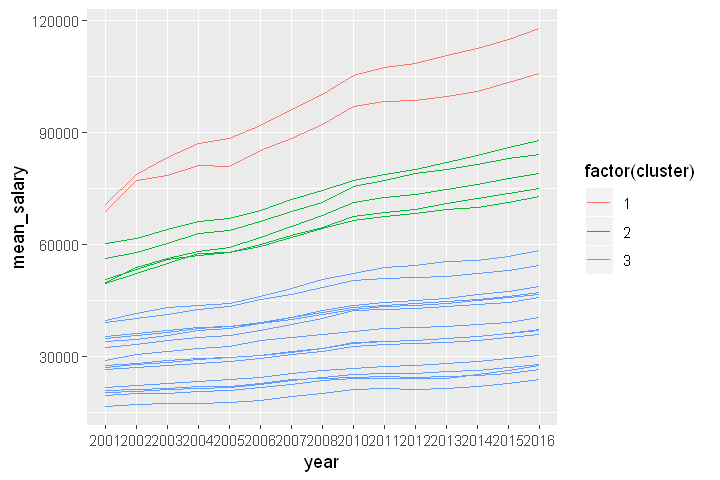

In [46]:
# View the clustering assignments by sorting the cluster assignment vector
sort(cut_oes)

# Plot the relationship between mean_salary and year and color the lines by the assigned cluster
ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(cluster))) + 
    geom_line(aes(group = occupation))


From this work it looks like both Management & Legal professions (cluster 1) experienced the most rapid growth in these 15 years. Let's see what we can get by exploring this data using k-means. 

### K-means: Elbow analysis

In the previous exercises you used the dendrogram to propose a clustering that generated 3 trees. In this exercise you will leverage the k-means elbow plot to propose the "best" number of clusters.

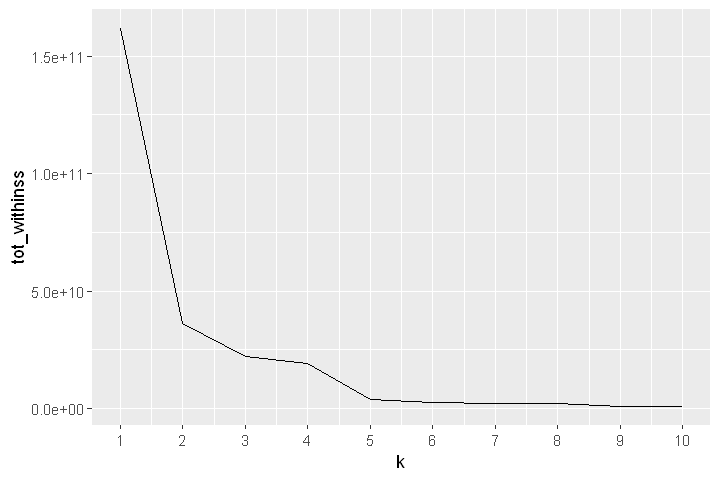

In [48]:
# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = oes , centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10,
  tot_withinss = tot_withinss
)

# Plot the elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss))+
  geom_line() +
  scale_x_continuous(breaks = 1:10)

So the elbow analysis proposes a different value of k, in the next section let's see what we can learn from Silhouette Width Analysis. 

### K-means: Average Silhouette Widths

So hierarchical clustering resulting in 3 clusters and the elbow method suggests 2. In this exercise use average silhouette widths to explore what the "best" value of k should be.

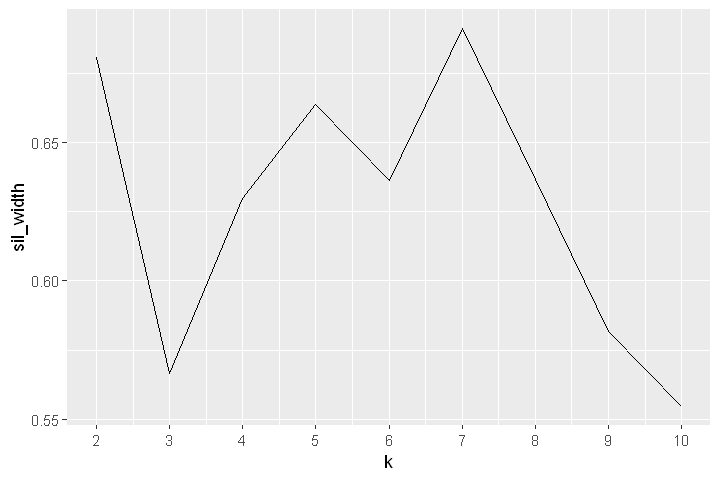

In [49]:
# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(oes, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)

It seems that this analysis results in another value of k, this time 7 is the top contender (although 2 comes very close). 

In [57]:
set.seed(42)

# model for k2 and k7
model_k2 <- kmeans(x = oes, centers = 2)
model_k7 <- pam(oes, k = 7)

Management        Business Operations 
                         1                          2 
          Computer Science   Architecture/Engineering 
                         3                          3 
 Life/Physical/Social Sci.         Community Services 
                         2                          4 
                     Legal Education/Training/Library 
                         1                          5 
 Arts/Design/Entertainment   Healthcare Practitioners 
                         5                          2 
        Healthcare Support         Protective Service 
                         6                          4 
          Food Preparation  Grounds Cleaning & Maint. 
                         6                          6 
             Personal Care                      Sales 
                         6                          7 
     Office Administrative   Farming/Fishing/Forestry 
                         7                          6 
              Construction Installation/Repair/Maint. 
                         4                          4 
                Production      Transportation/Moving 
                         7                          7

Management        Business Operations 
                         2                          2 
          Computer Science   Architecture/Engineering 
                         2                          2 
 Life/Physical/Social Sci.         Community Services 
                         2                          1 
                     Legal Education/Training/Library 
                         2                          1 
 Arts/Design/Entertainment   Healthcare Practitioners 
                         1                          2 
        Healthcare Support         Protective Service 
                         1                          1 
          Food Preparation  Grounds Cleaning & Maint. 
                         1                          1 
             Personal Care                      Sales 
                         1                          1 
     Office Administrative   Farming/Fishing/Forestry 
                         1                          1 
              Construction Installation/Repair/Maint. 
                         1                          1 
                Production      Transportation/Moving 
                         1                          1

In [60]:
# Extract the vector of cluster assignments from the model
oes_k2 <- model_k2$cluster
oes_k7 <- model_k7$clustering

head(clust_oes)


occupation,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016,cluster
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020,1
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070,2
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880,2
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300,2
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930,2
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200,3


In [61]:
# Build the segment_customers dataframe
oes_cluster <- mutate(clust_oes, cluster_k2 = oes_k2, cluster_k7 = oes_k7)

head(oes_cluster)

occupation,2001,2002,2003,2004,2005,2006,2007,2008,2010,2011,2012,2013,2014,2015,2016,cluster,cluster_k2,cluster_k7
Management,70800,78870,83400,87090,88450,91930,96150,100310,105440,107410,108570,110550,112490,115020,118020,1,2,1
Business Operations,50580,53350,56000,57120,57930,60000,62410,64720,67690,68740,69550,71020,72410,73800,75070,2,2,2
Computer Science,60350,61630,64150,66370,67100,69240,72190,74500,77230,78730,80180,82010,83970,86170,87880,2,2,3
Architecture/Engineering,56330,58020,60390,63060,63910,66190,68880,71430,75550,77120,79000,80100,81520,82980,84300,2,2,3
Life/Physical/Social Sci.,49710,52380,54930,57550,58030,59660,62020,64280,66390,67470,68360,69400,70070,71220,72930,2,2,2
Community Services,34190,34630,35800,37050,37530,39000,40540,41790,43180,43830,44240,44710,45310,46160,47200,3,1,4


In [63]:
gathered_oes <- gather(data = oes_cluster, key = "year", value = "mean_salary", -occupation, -cluster, -cluster_k2, -cluster_k7)
head(gathered_oes)

occupation,cluster,cluster_k2,cluster_k7,year,mean_salary
Management,1,2,1,2001,70800
Business Operations,2,2,2,2001,50580
Computer Science,2,2,3,2001,60350
Architecture/Engineering,2,2,3,2001,56330
Life/Physical/Social Sci.,2,2,2,2001,49710
Community Services,3,1,4,2001,34190


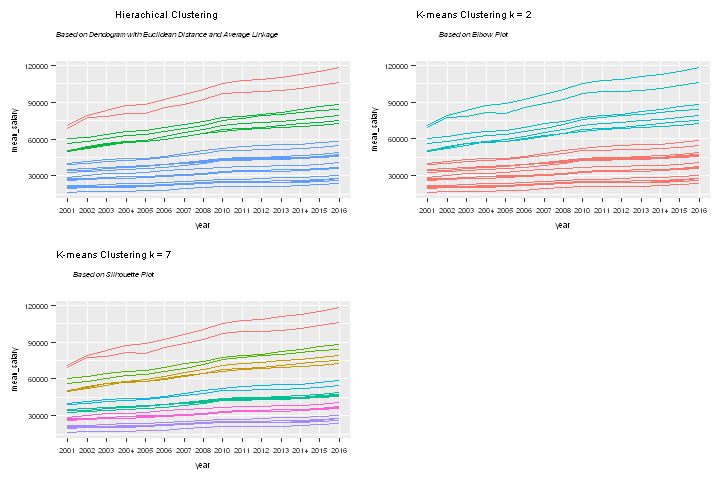

In [78]:
library(gridExtra)

plot1 <- ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(cluster))) + 
    geom_line(aes(group = occupation))+
    scale_color_discrete(guide=FALSE)+
    theme(text = element_text(size=5))+
    ggtitle(expression(atop("Hierachical Clustering", atop(italic("Based on Dendogram with Euclidean Distance and Average Linkage"), ""))))
    
plot2 <- ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(cluster_k2))) +
    geom_line(aes(group = occupation))+
    scale_color_discrete(guide=FALSE)+
    theme(text = element_text(size=5))+
    ggtitle(expression(atop("K-means Clustering k = 2", atop(italic("Based on Elbow Plot"), ""))))
plot3 <- ggplot(gathered_oes, aes(x = year, y = mean_salary, color = factor(cluster_k7))) +
    geom_line(aes(group = occupation))+
    scale_color_discrete(guide=FALSE) +
    theme(text = element_text(size=5)) +
    ggtitle(expression(atop("K-means Clustering k = 7", atop(italic("Based on Silhouette Plot"), ""))))

grid.arrange(plot1, plot2, plot3, ncol = 2)